# Applied Hypothesis Testing & Regression Basics

## Practical Hypothesis Testing: Comparing Means

- comparing two groups

### A/B Testing
- two versions of a website, A and B
- show A to half the users, B to the other half
- Question: Is B truly better than A?

### T-Test for Comparing Means

- helps determine if difference between two means is statistically significant
- difference is statistically significant if it is likely to reflect a true difference in the underlying populations
- there are different versions of the t-test!
    - indepenent samples t-test for completely separate groups
    - paired samples t-test for before-and-after measurements of the same group
    - and others -> google the one you need before applying!
- today: independent samples t-test (common for A/B tests)

### A/B Testing a Website Design

Scenario: Changed the colour of the "sign up for newsletter" button on our website

Group A (control): Saw old button colour. 1000 visitors, 100 clicks -> 10% conversion

Group B (new design): Saw new button color. 1000 visitors, 120 clicks -> 12% conversion

Is the 2% difference in conversion rate real or just luck?

#### Formally

1. Formulate Hypotheses and significance level
H0: ???
Ha: ???

2. Simulate Data and Perform t-test

3. Interpret p-value and conclude

In [10]:
import numpy as np
from scipy.stats import ttest_ind

# generate fake data
group_a = np.hstack((np.zeros(900), np.ones(100)))
group_b = np.hstack((np.zeros(880), np.ones(120)))

ttest_ind(group_a, group_b)

TtestResult(statistic=np.float64(-1.4293161949953799), pvalue=np.float64(0.1530697013791538), df=np.float64(1998.0))

In [12]:
# ttest returned also a "statistic" and a "df", what are these?

In [86]:
# another example - bmi by sex. Do you think that women and men have different BMIs?

from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True, scaled=False)
diabetes['data'].head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [88]:
bmi1 = diabetes['data'][diabetes['data'].sex==1].bmi
bmi2 = diabetes['data'][diabetes['data'].sex==2].bmi
ttest_ind(bmi1, bmi2)

TtestResult(statistic=np.float64(-1.8565180114433686), pvalue=np.float64(0.06404795642083816), df=np.float64(440.0))

## Correlation

- measuring relationsip between two variables
- considers only linear relationships (straight line)

### Correlation coefficent
- quantifies relationship between two numerical variables
- often (but not always) called `r`
- ranges from -1 to +1
    - r = 1 -> perfect positive linear relationship; as one variable increases, the other increases perfectly proportinally
    - r = -1 -> perfect negative linear relationship
    - r = 0 -> no linear relationship (e.g. shoe size and IQ)
    - large absolute values (above +/- 0.7) indicate a strong relationship

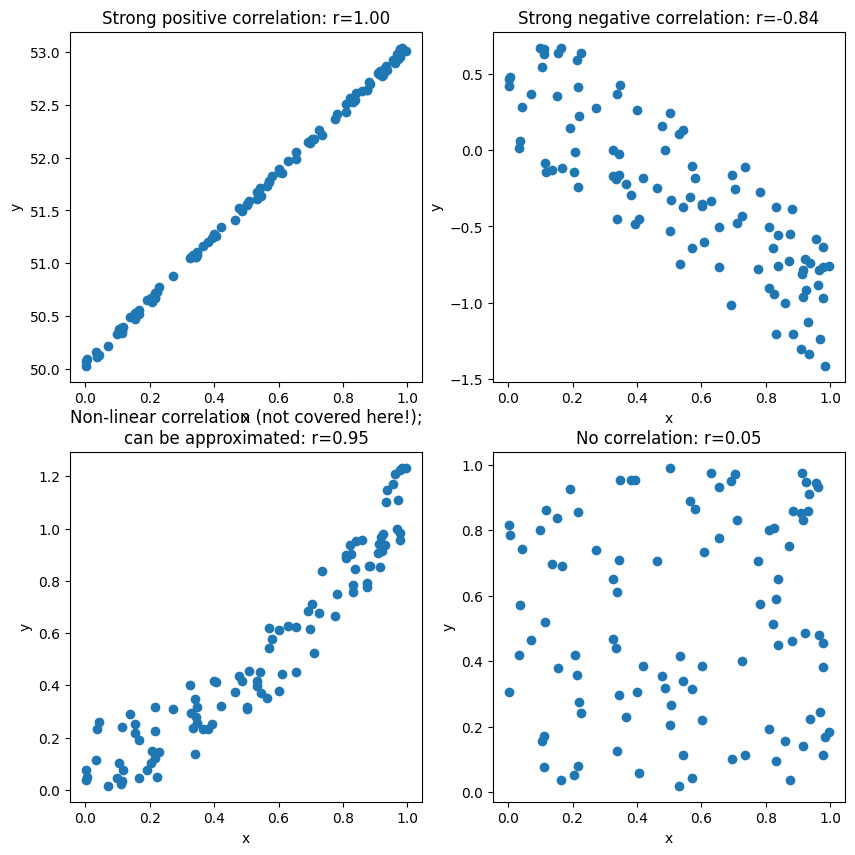

In [43]:
import matplotlib.pyplot as plt

x = np.random.random(100)
y1 = 3 * x + 50 + 0.1 * np.random.random(100)
y2 = - 1.5 * x +  np.random.random(100)
y3 = x * x + 0.3 * np.random.random(100)
y4 = np.random.random(100)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].scatter(x, y1)
ax[0, 0].set_title(f'Strong positive correlation: r={np.corrcoef(x, y1)[0, 1]:.2f}')
ax[0, 1].scatter(x, y2)
ax[0, 1].set_title(f'Strong negative correlation: r={np.corrcoef(x, y2)[0, 1]:.2f}')
ax[1, 0].scatter(x, y3)
ax[1, 0].set_title(f'Non-linear correlation (not covered here!);\ncan be approximated: r={np.corrcoef(x, y3)[0, 1]:.2f}')
ax[1, 1].scatter(x, y4)
ax[1, 1].set_title(f'No correlation: r={np.corrcoef(x, y4)[0, 1]:.2f}')
for a in ax.ravel():
    a.set_xlabel('x')
    a.set_ylabel('y')

### Correlation vs Causation

- Icecream sales are highly correlated with drowning deaths
- Visits from priests are also highly correlated with deaths
- Number of firefighters in a fire is highly correlated with fire damage

-> correlation does NOT tell you why things move together or if one is causing the other!

In [54]:
# going back to our diabetes dataset - what causes diabetes?
diabetes['target'].head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Before we continue, let's think about the datapoints - we will ignore all the "s" columns. But what other column should we ignore?

In [64]:
# correlation between the first four features and diabetes progression
import pandas as pd
df = diabetes['data']
df['progression'] = diabetes['target']
df[['age', 'sex', 'bmi', 'bp', 'progression']].corr()  # (gotcha - can we really correlate all these values?)

,age,sex,bmi,bp,progression
age,1.000000,0.173737,0.185085,0.335428,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.441482
progression,0.187889,0.043062,0.586450,0.441482,1.000000


Text(0.5, 1.0, 'BMI vs Diabetes Progression (422 samples)')

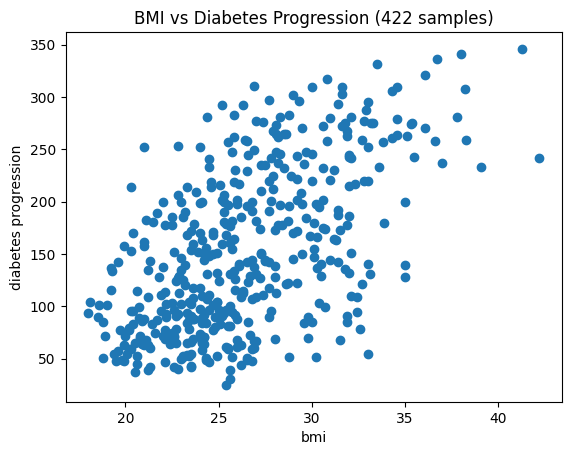

In [66]:
plt.scatter(df.bmi, df.progression)
plt.ylabel('diabetes progression')
plt.xlabel('bmi')
plt.title('BMI vs Diabetes Progression (422 samples)')

## Linear Regression

- if two variables are correlated, we can use one to predict the other
- regression: statistical method to predict a target variable based on values of input variables
- simplest case: one input variable (x), one output variable (y)
- goal: find the best straight line that describes the relationship between x and y

### Equation of a Line

$ y(x) = b_0 + b_1x + e $

- $b_0$ : intercept; predicted value of $y$ when $x$ is 0
- $b_1$: slope; how much $y$ is expected to change for every 1 unit increase of $x$
- $e$: error; no real world relationship is perfectly straight

#### Interpreting Slope

- postivie $b_1$: $y$ tends to increase as $x$ increases
- negative $b_1$: $y$ tends to decrease as $x$ decreases

#### Example: Predicting diabetes based on BMI

assume $price = 50,000 + 400 * size$ (size is in sqm)

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['bmi']], df.progression)

print(f'Fitted model has slope {model.coef_[0]:.3f} and intercept {model.intercept_:.3f}')

Fitted model has slope 10.233 and intercept -117.773


/home/darina/fita/tenx-dsml/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


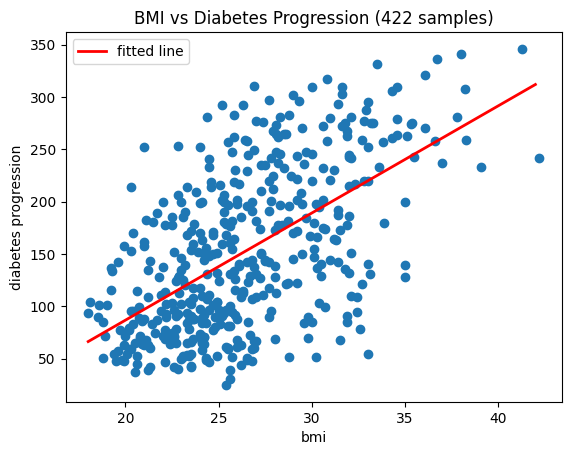

In [83]:
plt.scatter(df.bmi, df.progression)
x = np.arange(df.bmi.min(), df.bmi.max(), 1)
y = model.predict(x.reshape(-1, 1))
plt.plot(x, y, color='r', linewidth=2, label='fitted line')
plt.ylabel('diabetes progression')
plt.xlabel('bmi')
plt.title('BMI vs Diabetes Progression (422 samples)')
_ = plt.legend()

The math behind regression is quite complex, in the beginning it's more important to interpret the results!

## Multivariate Linear Regression
- will add more input variables that all have a different relationship with the target varable (and with each other)
- $b_0$ and $b_1$ become matrices
- we could just throw the whole dataset into the regression in sklearn and get a fitted line back!

## Logistic Regression
- y is binary

## Recap

- A/B test
- t-test
- correlation coefficient
- correlation vs causation
- univariate linear regression

## Questions?

# Key Takeaways from Today

- data summarisation and visualisation are crucial for initial understanding
- probability helps quantify and navigate uncertainty
- inferential staticstics help generaize from a small sample to a large population
- hypothesis testing provdes a structured way to make evidence-based decisions
- regression helps understand relationships between variables and make predictive models


## What's next?

Topics to explore to get better at statistics
- more advanced statistical tests (e.g. ANOVA, Chi-Squared)
- Bayesian statistcis (different approach to probability and inference)
- More advanced data visualisation techniques
- Practical projects!

Resources:
- Talking to LLMs
- Online Courses (Coursera, edX, Khan Academy...)
- Books:
    - Naked Statistics (Charles Wheelan)
    - Practical Statistics for Data Scientists (more hands-on Python)
- Data Science communities and forums (Stats StackExchange)